# IMPORT LIBRARIES 

In [3]:
import os 
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

ModuleNotFoundError: No module named 'stable_baselines3'

# SETTING UP ENVIRONMENT


In [9]:
Environment_name = 'CartPole-v0'
env = gym.make(Environment_name, render_mode="human")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v0>>>>>

In [10]:
episodes = 5

for episode in range(1, episodes+1):
    
    done = False
    state = env.reset()
    score = 0
    
    while not done :
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        score += reward
    print(f"episode : {episode}, score : {score}")  
    
# env.close()      
        

episode : 1, score : 12.0
episode : 2, score : 20.0
episode : 3, score : 30.0
episode : 4, score : 9.0
episode : 5, score : 19.0


# UNDERSTANDING THE ENVIRONMENT 

In [11]:
print("step function :", env.step(1))
print("Action space : ", env.action_space)
print("Observation space :", env.observation_space)

step function : (array([-0.08917944, -0.04917742,  0.23026636,  0.598219  ], dtype=float32), 0.0, True, False, {})
Action space :  Discrete(2)
Observation space : Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [12]:
print(env.action_space.sample())
print(env.observation_space.sample())

1
[-2.1800842e+00 -4.3599985e+37 -2.5992227e-01  1.6607002e+38]


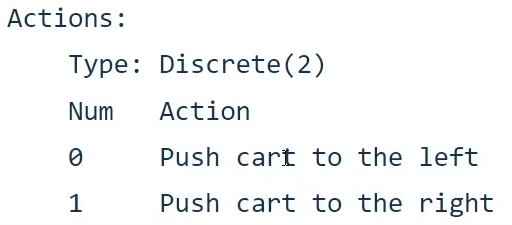

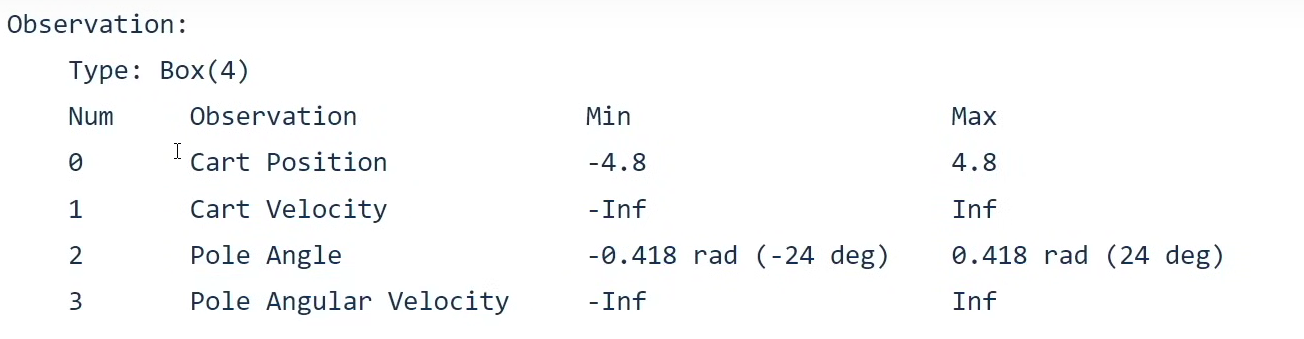

# TRAINING MODEL

In [3]:
import torch
torch.cuda.is_available()

False

In [13]:
log_path =  os.path.join('training', 'Logs')
log_path

'training\\Logs'

In [14]:
env =  gym.make(Environment_name, render_mode="human")
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log = log_path)

c:\Users\ASUS\anaconda3\envs\rl_breakout_env\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device


In [30]:
model.learn(total_timesteps= 20000)

Logging to training\Logs\PPO_7
-----------------------------
| time/              |      |
|    fps             | 45   |
|    iterations      | 1    |
|    time_elapsed    | 44   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 2           |
|    time_elapsed         | 92          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008343709 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00363    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.02        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 52.3        |
-----------------------------------------
---

# SAVE and RELOAD THE MODEL

In [31]:
PPO_path = os.path.join('training', 'Models', 'PPO_MODEL_CARTPOLE')
model.save(PPO_path)

In [32]:
del model

In [33]:
model = PPO.load(PPO_path, env)

# EVALUATION 


For the cartpole a score of 200 is considered as good performance.

In [34]:
evaluate_policy(model, env, 10, render= True)

(200.0, 0.0)

In [35]:
# env.close()

# TESTING THE MODEL

In [37]:
episodes = 5

for episode in range(1, episodes+1):
    
    done = False
    obs = env.reset()
    score = 0
    
    while not done :
        
        env.render()
        action,_ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        score += reward
    print(f"episode : {episode}, score : {score}")  
    
# env.close()      
        

episode : 1, score : [200.]
episode : 2, score : [200.]
episode : 3, score : [200.]
episode : 4, score : [200.]
episode : 5, score : [200.]


In [39]:
obs

array([[-0.04413334,  0.02501236, -0.00988306,  0.02757835]],
      dtype=float32)

In [38]:
model.predict(obs)

(array([1], dtype=int64), None)

In [40]:
env.step(action)

(array([[-0.04363309,  0.22027464, -0.0093315 , -0.26820633]],
       dtype=float32),
 array([1.], dtype=float32),
 array([False]),
 [{'TimeLimit.truncated': False}])

# VIEWING LOGS IN TENSORBOARD

In [45]:
training_log_path = os.path.join(log_path, 'PPO_7')
training_log_path

'training\\Logs\\PPO_7'

In [57]:
import os
log_path = os.path.join('training', 'Logs', 'PPO_7')
print(os.path.abspath(log_path))

c:\Users\ASUS\OneDrive\Documents\VSCODE\REINFORCMENT_LEARNING\training\Logs\PPO_7


In [59]:
# !tensorboard --logdir=training/Logs/PPO_7


^C


Goto:  http://localhost:6006/

# ADDING CALLBACK TO TRAINING

In [60]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [63]:
save_path = os.path.join('training', 'Models')
save_path

'training\\Models'

In [69]:
call_back = StopTrainingOnRewardThreshold(reward_threshold = 200, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best = call_back, 
                             eval_freq= 10000, 
                             best_model_save_path= save_path,
                             verbose=1)

In [70]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log = log_path)

Using cuda device


c:\Users\ASUS\anaconda3\envs\pytorch_env\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [72]:
model.learn(total_timesteps = 20000, callback = eval_callback)

Logging to training\Logs\PPO_7\PPO_2


-----------------------------
| time/              |      |
|    fps             | 46   |
|    iterations      | 1    |
|    time_elapsed    | 44   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 44          |
|    iterations           | 2           |
|    time_elapsed         | 92          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008505199 |
|    clip_fraction        | 0.0955      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.000955    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.09        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.015      |
|    value_loss           | 45.1        |
-----------------------------------------
----------------------------------

c:\Users\ASUS\anaconda3\envs\pytorch_env\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8576, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 200         |
|    mean_reward          | 200         |
| time/                   |             |
|    total_timesteps      | 8576        |
| train/                  |             |
|    approx_kl            | 0.010390793 |
|    clip_fraction        | 0.0974      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.603      |
|    explained_variance   | 0.305       |
|    learning_rate        | 0.0003      |
|    loss                 | 16.7        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0201     |
|    value_loss           | 56.1        |
-----------------------------------------
New best mean reward!
Stopping training because the mean reward 200.00  is above the threshold 200


# ADDING NEW POLICY

In [73]:
net_arch = [dict(pi=[128,128,128,128], vp = [128,128,128,128])]

In [75]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log = log_path, policy_kwargs={'net_arch': net_arch})

Using cuda device


c:\Users\ASUS\anaconda3\envs\pytorch_env\Lib\site-packages\stable_baselines3\common\policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\pytorch_env\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [76]:
model.learn(total_timesteps = 20000,  callback = eval_callback,)

Logging to training\Logs\PPO_7\PPO_3
-----------------------------
| time/              |      |
|    fps             | 46   |
|    iterations      | 1    |
|    time_elapsed    | 44   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 43          |
|    iterations           | 2           |
|    time_elapsed         | 93          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.016325153 |
|    clip_fraction        | 0.299       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.679      |
|    explained_variance   | 0.00843     |
|    learning_rate        | 0.0003      |
|    loss                 | 44.3        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0364     |
|    value_loss           | 88.9        |
---------------------------------------

c:\Users\ASUS\anaconda3\envs\pytorch_env\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 200         |
|    mean_reward          | 200         |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.008946551 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.582      |
|    explained_variance   | -0.00559    |
|    learning_rate        | 0.0003      |
|    loss                 | 114         |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.012      |
|    value_loss           | 214         |
-----------------------------------------
------------------------------
| time/              |       |
|    fps             | 39    |
|    iterations      | 5     |
|    time_elapsed    | 261   |


#   USING ALTERNATIVE ALGORITHM

In [79]:
from stable_baselines3 import DQN

model = DQN('MlpPolicy', env, verbose = 1, tensorboard_log = log_path)

model.learn(total_timesteps=20000, callback=eval_callback)

Using cuda device
Logging to training\Logs\PPO_7\DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 46       |
|    time_elapsed     | 1        |
|    total_timesteps  | 80       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 45       |
|    time_elapsed     | 3        |
|    total_timesteps  | 165      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.56     |
|    n_updates        | 16       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.878    |
| time/               |          |
|    episodes         | 12       |


c:\Users\ASUS\anaconda3\envs\pytorch_env\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9520, episode_reward=9.20 +/- 0.75
Episode length: 9.20 +/- 0.75
----------------------------------
| eval/               |          |
|    mean_ep_length   | 9.2      |
|    mean_reward      | 9.2      |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 9520     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00278  |
|    n_updates        | 2354     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 916      |
|    fps              | 43       |
|    time_elapsed     | 219      |
|    total_timesteps  | 9541     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00205  |
|    n_updates        | 2360     |
----------------------------------
------

In [80]:
model_save_path = os.path.join('training','Models','DQN_MODEL_CARTPOLE')
model.save(model_save_path)